In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import MultipleLocator
import gzip
import os
import time
import re
from curses.ascii import isdigit
import pandas as pd

os.environ["PATH"]='/home/wu/anaconda3/bin:/home/wu/anaconda3/condabin:/usr/local/texlive/2022/bin/x86_64-linux:/home/wu/bin:/usr/local/bin:/home/wu/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin'

# plt.rcParams.update({
# "text.usetex": True,
# "font.family": "sans-serif",
# "font.sans-serif": ["Helvetica"]})
plt.rcParams.update({
    "text.usetex": True,
    # "font.family": "Helvetica"
})

In [ ]:
def plot_bar(x,y,bar_width=2,pic_name=1,save=False,xlabel="TX rate / (TXs/Sec)",ylabel="Throughput (tps)",text_location=50,ylim=2800):
    fig, leftaxis = plt.subplots(figsize=(6, 4))
    
    leftaxis.bar(x, y, color='#4eb3d3', label='Throughput',width=bar_width,zorder=2)
    # bar的zorder取2
    for i, val in enumerate(y):
        leftaxis.text(x[i], val+text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
    leftaxis.grid(axis='y',linestyle='--',zorder=0)
    # grid的zorder取0
    x_major_locator=MultipleLocator(bar_width*2)
    leftaxis.xaxis.set_major_locator(x_major_locator)
    leftaxis.set_xlabel(xlabel)
    leftaxis.set_ylabel(ylabel)
    leftaxis.set_ylim(0, ylim)
    if save:
        plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())+"_Figure_"+str(pic_name)+".png", dpi=600, bbox_inches='tight')
    plt.show()
    
def readfile(src="source/graph.txt"):
    input = list()
    with open(src, "r") as f:
        readin=f.read().split("\n\n")
        temp_array = np.array([])
        for string in readin:
            if string[0].isdigit():
                blocks = string.split("\n")
                for block_ in blocks:
                    rowarray = np.fromstring(block_,dtype=float,sep=' ')
                    input.append(rowarray)
    for i,s in enumerate(input):
        input[i] = np.around(s,2)
    return input
    
np.set_printoptions(suppress=True)

def plot_beta(data,bar_width=2,pic_name=1,save=False,xlabel="TX rate / (TXs/Sec)",ylabel="Throughput (tps)",text_location=50,ylim=2800,labellist=['bsize=100','bsize=150','bsize=80','bsize=50']):
    colorlist = ['orange','red','grey','black','blue','green']
    markerlist = ['o','^','x','s']
    x = data[0,:]
    ynum = np.size(data,0)-1
    y = data[1:ynum+1,:]
    fig, leftaxis = plt.subplots(figsize=(6, 4))
    for i in range(ynum):
        leftaxis.plot(x, y[i,:], color=colorlist[i], label=labellist[i],zorder=2,marker=markerlist[i])
        for j, val in enumerate(y[i,:]):
            if i:
                leftaxis.text(x[j], val+text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
            else:
                leftaxis.text(x[j], val-3*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})

    leftaxis.grid(axis='y',linestyle='--',zorder=0)
    leftaxis.grid(axis='x',linestyle='--',zorder=0)
    
    leftaxis.set_xlabel(xlabel)
    leftaxis.set_ylabel(ylabel)
    leftaxis.set_ylim(0, ylim)
    leftaxis.set_xticks(x, x.astype(int))
    print(x)
    leftaxis.legend(loc=0)
    if save:
        plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())+"_Figure_"+str(pic_name)+".png", dpi=600, bbox_inches='tight')
    plt.show()


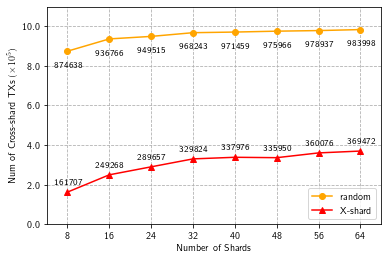

In [22]:
def plot_beta(data,bar_width=2,pic_name=1,save=False,xlabel="TX rate / (TXs/Sec)",ylabel="Throughput (tps)",text_location=50,ylim=2800,labellist=['bsize=100','bsize=150','bsize=80','bsize=50'],ytick_k=False,xlim=1000000,xscale=5):
    colorlist = ['orange','red','grey','black','blue','green']
    markerlist = ['o','^','x','s']
    x = data[0,:]
    ynum = np.size(data,0)-1
    y = data[1:ynum+1,:]
    fig, leftaxis = plt.subplots(figsize=(6, 4))
    for i in range(ynum):
        leftaxis.plot(x, y[i,:], color=colorlist[i], label=labellist[i],zorder=2,marker=markerlist[i])
        for j, val in enumerate(y[i,:]):
            if i:
                leftaxis.text(x[j], val+text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
            else:
                leftaxis.text(x[j], val-3*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})

    leftaxis.grid(axis='y',linestyle='--',zorder=0)
    leftaxis.grid(axis='x',linestyle='--',zorder=0)
    
    leftaxis.set_xlabel(xlabel)
    leftaxis.set_ylabel(ylabel)
    leftaxis.set_ylim(0, ylim)
    leftaxis.set_xticks(x, x.astype(int))
    # print(x)
    leftaxis.legend(loc=0)
    if ytick_k:
        plt.yticks(np.linspace(0,xlim,xscale+1),np.linspace(0,10,xscale+1))
        plt.xticks(np.linspace(8,64,8))
        leftaxis.set_xlim(4, 68)
    if save:
        plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())+"_Figure_"+str(pic_name)+".png", dpi=600, bbox_inches='tight')
    plt.show()

data = np.genfromtxt('cr-tx.csv', delimiter=',')

data = np.delete(data,0,axis=0)

data = np.transpose(data)

data = data.astype(int)

x = data[0,:]

plot_beta(data=data,bar_width=(x[1]-x[0])/2,pic_name=11,save=True,xlabel="Number of Shards", ylabel=r'Num of Cross-shard TXs $(\times 10^5)$',text_location=30000,xlim=1000000,ylim=1100000,labellist=['random','X-shard','cross-shard tx'],ytick_k=True)

In [4]:
np.linspace(0,1000000,5)

array([      0.,  250000.,  500000.,  750000., 1000000.])

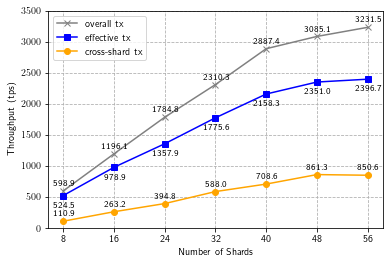

In [8]:
data = np.loadtxt('source/result.txt')
data = np.transpose(data)
data = data.round(1)

def plot_line_chart(data,pic_name='txrate',save=False,xlabel="TX rate / (TXs/Sec)",ylabel="Throughput (tps)",text_location=50,ylim=2800,labellist=['bsize=100','bsize=150','bsize=80','bsize=50'],ytick_k=False,xlim=1000000,xscale=5,colorlist = ['orange','red','grey','black','blue','green'],markerlist = ['o','^','x','s','v','1','v']):
    x = data[0,:]
    ynum = np.size(data,0)-1
    y = data[1:ynum+1,:]
    fig, leftaxis = plt.subplots(figsize=(6, 4))
    for i in range(ynum):
        leftaxis.plot(x, y[i,:], color=colorlist[i], label=labellist[i],zorder=2,marker=markerlist[i])
        for j, val in enumerate(y[i,:]):
            if i==1:
                leftaxis.text(x[j], val-4.5*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
            else:
                leftaxis.text(x[j], val+text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})

    leftaxis.grid(axis='y',linestyle='--',zorder=0)
    leftaxis.grid(axis='x',linestyle='--',zorder=0)
    
    leftaxis.set_xlabel(xlabel)
    leftaxis.set_ylabel(ylabel)
    leftaxis.set_ylim(0, ylim)
    leftaxis.set_xticks(x, x.astype(int))
    # print(x)
    leftaxis.legend(loc=0)
    if ytick_k:
        plt.yticks(np.linspace(0,xlim,xscale+1),np.linspace(0,10,xscale+1))
        plt.xticks(np.linspace(8,64,8))
        leftaxis.set_xlim(4, 68)
    if save:
        plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())+"_Figure_"+pic_name+".png", dpi=600, bbox_inches='tight')
    plt.show()

plot_line_chart(data=data,pic_name='throughtput',save=True,xlabel="Number of Shards", ylabel="Throughput (tps)",text_location=50,ylim=3500,labellist=['overall tx','effective tx','cross-shard tx'],colorlist = ['grey','blue','orange','black','blue','green'],markerlist = ['x','s','o','s','v','1','v'])

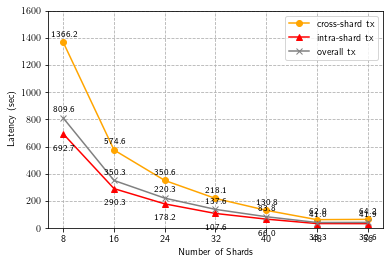

In [6]:
df = pd.read_csv('source/latency.csv')

data = np.transpose(df.to_numpy())
data = data.round(1)


def plot_line_chart(data,pic_name='txrate',save=False,xlabel="TX rate / (TXs/Sec)",ylabel="Throughput (tps)",text_location=50,ylim=2800,labellist=['bsize=100','bsize=150','bsize=80','bsize=50'],ytick_k=False,xlim=1000000,xscale=5,colorlist = ['orange','red','grey','black','blue','green'],markerlist = ['o','^','x','s','v','1','v']):
    x = data[0,:]
    ynum = np.size(data,0)-1
    y = data[1:ynum+1,:]
    fig, leftaxis = plt.subplots(figsize=(6, 4))
    for i in range(ynum):
        leftaxis.plot(x, y[i,:], color=colorlist[i], label=labellist[i],zorder=2,marker=markerlist[i])
        for j, val in enumerate(y[i,:]):
            if i==1:
                leftaxis.text(x[j], val-4.5*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
            else:
                leftaxis.text(x[j], val+text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})

    leftaxis.grid(axis='y',linestyle='--',zorder=0)
    leftaxis.grid(axis='x',linestyle='--',zorder=0)
    
    leftaxis.set_xlabel(xlabel)
    leftaxis.set_ylabel(ylabel)
    leftaxis.set_ylim(0, ylim)
    leftaxis.set_xticks(x, x.astype(int))
    # print(x)
    leftaxis.legend(loc=0)
    if ytick_k:
        plt.yticks(np.linspace(0,xlim,xscale+1),np.linspace(0,10,xscale+1))
        plt.xticks(np.linspace(8,64,8))
        leftaxis.set_xlim(4, 68)
    if save:
        plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())+"_Figure_"+pic_name+".png", dpi=600, bbox_inches='tight')
    plt.show()

plot_line_chart(data=data,pic_name='latency',save=False,xlabel="Number of Shards", ylabel="Latency (sec)",text_location=30,ylim=1600,labellist=['cross-shard tx', 'intra-shard tx', 'overall tx'])

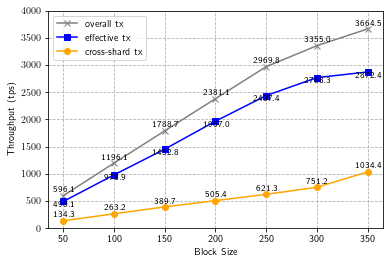

In [4]:
def plot_line_chart(data,pic_name='txrate',save=False,xlabel="TX rate / (TXs/Sec)",ylabel="Throughput (tps)",text_location=50,ylim=2800,labellist=['bsize=100','bsize=150','bsize=80','bsize=50'],ytick_k=False,xlim=1000000,xscale=5,colorlist = ['orange','red','grey','black','blue','green'],markerlist = ['o','^','x','s','v','1','v']):
    x = data[0,:]
    ynum = np.size(data,0)-1
    y = data[1:ynum+1,:]
    fig, leftaxis = plt.subplots(figsize=(6, 4))
    for i in range(ynum):
        leftaxis.plot(x, y[i,:], color=colorlist[i], label=labellist[i],zorder=2,marker=markerlist[i])
        for j, val in enumerate(y[i,:]):
            if i==1:
                leftaxis.text(x[j], val-4.5*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
            else:
                leftaxis.text(x[j], val+text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})

    leftaxis.grid(axis='y',linestyle='--',zorder=0)
    leftaxis.grid(axis='x',linestyle='--',zorder=0)
    
    leftaxis.set_xlabel(xlabel)
    leftaxis.set_ylabel(ylabel)
    leftaxis.set_ylim(0, ylim)
    leftaxis.set_xticks(x, x.astype(int))
    # print(x)
    leftaxis.legend(loc=0)
    if ytick_k:
        plt.yticks(np.linspace(0,xlim,xscale+1),np.linspace(0,10,xscale+1))
        plt.xticks(np.linspace(8,64,8))
        leftaxis.set_xlim(4, 68)
    if save:
        plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())+"_Figure_"+pic_name+".png", dpi=600, bbox_inches='tight')
    plt.show()

data=np.loadtxt('source/blk_size.txt')
data=np.transpose(data)
data=data.round(1)

plot_line_chart(data=data,pic_name='blk_size_throughput',save=True,xlabel="Block Size", ylabel="Throughput (tps)",text_location=30,ylim=4000,labellist=['overall tx', 'effective tx', 'cross-shard tx'],colorlist = ['grey','blue','orange','black','blue','green'],markerlist = ['x','s','o','s','v','1','v'])

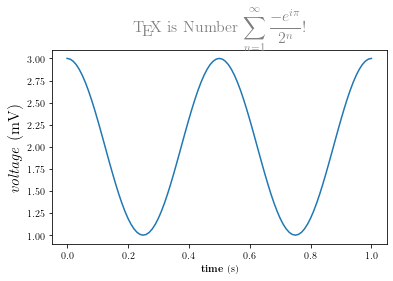

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Example data
t = np.arange(0.0, 1.0 + 0.01, 0.01)
s = np.cos(4 * np.pi * t) + 2

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(t, s)

plt.xlabel(r'\textbf{time} (s)')
plt.ylabel(r'\textit{voltage} (mV)',fontsize=16)
plt.title(r"\TeX\ is Number "
          r"$\displaystyle\sum_{n=1}^\infty\frac{-e^{i\pi}}{2^n}$!",
          fontsize=16, color='gray')
# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)

plt.savefig('tex_demo')
plt.show()

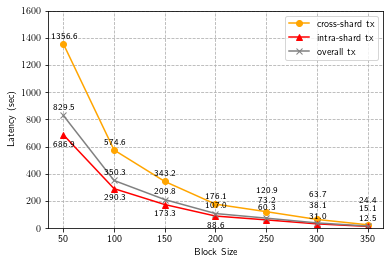

In [76]:
df = pd.read_csv('source/latency_blksize.csv')
data = np.transpose(df.to_numpy())
data = data.round(1)

def plot_line_chart(data,pic_name='txrate',save=False,xlabel="TX rate / (TXs/Sec)",ylabel="Throughput (tps)",text_location=50,ylim=2800,labellist=['bsize=100','bsize=150','bsize=80','bsize=50'],ytick_k=False,xlim=1000000,xscale=5,colorlist = ['orange','red','grey','black','blue','green'],markerlist = ['o','^','x','s','v','1','v']):
    x = data[0,:]
    ynum = np.size(data,0)-1
    y = data[1:ynum+1,:]
    fig, leftaxis = plt.subplots(figsize=(6, 4))
    for i in range(ynum):
        leftaxis.plot(x, y[i,:], color=colorlist[i], label=labellist[i],zorder=2,marker=markerlist[i])
        for j, val in enumerate(y[i,:]):
            if i==1:
                if j<4:
                    leftaxis.text(x[j], val-4*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
                else:
                    if j>4:
                        leftaxis.text(x[j], val+text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
                    else:
                        leftaxis.text(x[j], val+2.5*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9,})
            else:
                if j>3:
                    if j==4:
                        if i==0:
                            leftaxis.text(x[j], val+(5-i)*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
                        else:
                            leftaxis.text(x[j], val+(6-i)*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
                    else:
                        leftaxis.text(x[j], val+(6-i)*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
                else:
                    leftaxis.text(x[j], val+text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
    leftaxis.grid(axis='y',linestyle='--',zorder=0)
    leftaxis.grid(axis='x',linestyle='--',zorder=0)
    leftaxis.set_xlabel(xlabel)
    leftaxis.set_ylabel(ylabel)
    leftaxis.set_ylim(0, ylim)
    leftaxis.set_xticks(x, x.astype(int))
    leftaxis.legend(loc=0)
    if ytick_k:
        plt.yticks(np.linspace(0,xlim,xscale+1),np.linspace(0,10,xscale+1))
        plt.xticks(np.linspace(8,64,8))
        leftaxis.set_xlim(4, 68)
    if save:
        plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())+"_Figure_"+pic_name+".png", dpi=600, bbox_inches='tight')
    plt.show()

plot_line_chart(data=data,pic_name='latency-blksize',save=True,xlabel="Block Size", ylabel="Latency (sec)",text_location=25,ylim=1600,labellist=['cross-shard tx', 'intra-shard tx', 'overall tx'])

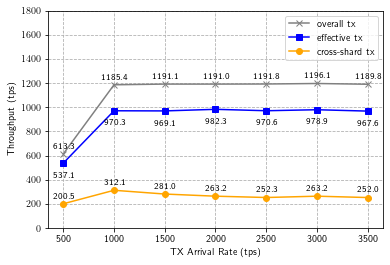

In [14]:
data=(np.transpose(np.loadtxt('source/th_txar.txt'))).round(1)

def plot_line_chart(data,pic_name='txrate',save=False,xlabel="TX rate / (TXs/Sec)",ylabel="Throughput (tps)",text_location=50,ylim=2800,labellist=['bsize=100','bsize=150','bsize=80','bsize=50'],ytick_k=False,xlim=1000000,xscale=5,colorlist = ['orange','red','grey','black','blue','green'],markerlist = ['o','^','x','s','v','1','v']):
    x = data[0,:]
    ynum = np.size(data,0)-1
    y = data[1:ynum+1,:]
    fig, leftaxis = plt.subplots(figsize=(6, 4))
    for i in range(ynum):
        leftaxis.plot(x, y[i,:], color=colorlist[i], label=labellist[i],zorder=2,marker=markerlist[i])
        for j, val in enumerate(y[i,:]):
            if i==1:
                leftaxis.text(x[j], val-4.5*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
            else:
                leftaxis.text(x[j], val+text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})

    leftaxis.grid(axis='y',linestyle='--',zorder=0)
    leftaxis.grid(axis='x',linestyle='--',zorder=0)
    
    leftaxis.set_xlabel(xlabel)
    leftaxis.set_ylabel(ylabel)
    leftaxis.set_ylim(0, ylim)
    leftaxis.set_xticks(x, x.astype(int))
    # print(x)
    leftaxis.legend(loc=0)
    if ytick_k:
        plt.yticks(np.linspace(0,xlim,xscale+1),np.linspace(0,10,xscale+1))
        plt.xticks(np.linspace(8,64,8))
        leftaxis.set_xlim(4, 68)
    if save:
        plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())+"_Figure_"+pic_name+".png", dpi=600, bbox_inches='tight')
    plt.show()


plot_line_chart(data=data,pic_name='throughput-txarate',save=True,xlabel="TX Arrival Rate (tps)", ylabel="Throughput (tps)",text_location=30,ylim=1800,labellist=['overall tx', 'effective tx', 'cross-shard tx'],colorlist = ['grey','blue','orange','black','blue','green'],markerlist = ['x','s','o','s','v','1','v'])

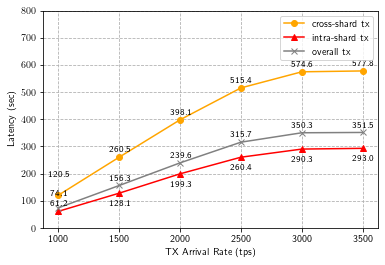

In [6]:
df = pd.read_csv('source/latency_txar.txt')
data = np.transpose(df.to_numpy())
data = data.round(1)

def plot_line_chart(data,pic_name='txrate',save=False,xlabel="TX rate / (TXs/Sec)",ylabel="Throughput (tps)",text_location=50,ylim=2800,labellist=['bsize=100','bsize=150','bsize=80','bsize=50'],ytick_k=False,xlim=1000000,xscale=5,colorlist = ['orange','red','grey','black','blue','green'],markerlist = ['o','^','x','s','v','1','v']):
    x = data[0,:]
    ynum = np.size(data,0)-1
    y = data[1:ynum+1,:]
    fig, leftaxis = plt.subplots(figsize=(6, 4))
    for i in range(ynum):
        leftaxis.plot(x, y[i,:], color=colorlist[i], label=labellist[i],zorder=2,marker=markerlist[i])
        for j, val in enumerate(y[i,:]):
            if i==1:
                if j==0:
                    leftaxis.text(x[j], val+1*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})  
                    # ,'color':'blue'
                else:                  
                    leftaxis.text(x[j], val-4.5*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
            else:
                if j==0:
                    leftaxis.text(x[j], val+(5-i)*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})  
                    # ,'color':'blue'
                else:
                    leftaxis.text(x[j], val+text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})

    leftaxis.grid(axis='y',linestyle='--',zorder=0)
    leftaxis.grid(axis='x',linestyle='--',zorder=0)
    
    leftaxis.set_xlabel(xlabel)
    leftaxis.set_ylabel(ylabel)
    leftaxis.set_ylim(0, ylim)
    leftaxis.set_xticks(x, x.astype(int))
    # print(x)
    leftaxis.legend(loc=0)
    if ytick_k:
        plt.yticks(np.linspace(0,xlim,xscale+1),np.linspace(0,10,xscale+1))
        plt.xticks(np.linspace(8,64,8))
        leftaxis.set_xlim(4, 68)
    if save:
        plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())+"_Figure_"+pic_name+".png", dpi=600, bbox_inches='tight')
    plt.show()

plot_line_chart(data=data,pic_name='latency-txar',save=True,xlabel="TX Arrival Rate (tps)", ylabel="Latency (sec)",text_location=12,ylim=800,labellist=['cross-shard tx', 'intra-shard tx', 'overall tx'])